In [252]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import linalg as LA

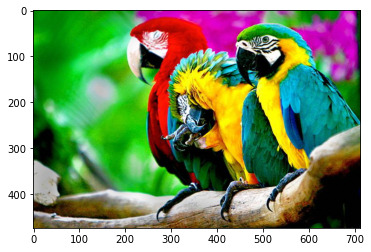

In [262]:
# 1. Загрузите картинку parrots.jpg. 
# Преобразуйте изображение, приведя все значения в интервал от 0 до 1. 
# Для этого можно воспользоваться функцией img_as_float из модуля skimage. 
# Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

from skimage.io import imread
from skimage import img_as_float

img = img_as_float(imread('parrots.jpg'))
plt.imshow(img)

In [263]:
# 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
m, n, k = img.shape
rgb = np.reshape(img, (m*n, k))

# 3. Запустите алгоритм K-Means с параметрами init=’k-means++’ и random_state=241. 
# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

from sklearn.cluster import KMeans
n_clust = 8
kmeans = KMeans(n_clusters = n_clust, init = 'k-means++', random_state=241)
clust = kmeans.fit(rgb)


In [264]:
# 4. Измерьте качество получившейся сегментации с помощью метрики PSNR. 
# Эту метрику нужно реализовать самостоятельно (см. определение).
# peak signal-to-noise ratio

def PSNR(im, new_im):
    m, n, k = im.shape
    mse = LA.norm((im - new_im))**2/(3*m*n)
    maxi = 1
    return 10*np.log10(maxi/mse)

def fill(old, n_clust, clust, type_of_fill):
    m, n, k = old.shape
    rgb = np.reshape(old, (m*n, k))
    new = np.zeros((m*n, k))

    for i in range(n_clust):
        pos = np.array(np.where(clust.predict(rgb) == i))[0]
        if (type_of_fill=='mean'): new[pos] = rgb[pos].mean(axis = 0)
        if (type_of_fill=='median'): new[pos] = np.median(rgb[pos], axis=0)

    new = new.reshape(m, n, k) 
    return new

new1 = fill(img, n_clust, clust, 'mean')
new2 = fill(img, n_clust, clust, 'median')
print(PSNR(img, new1), PSNR(img, new2))



18.436785916927228 18.142797115302283


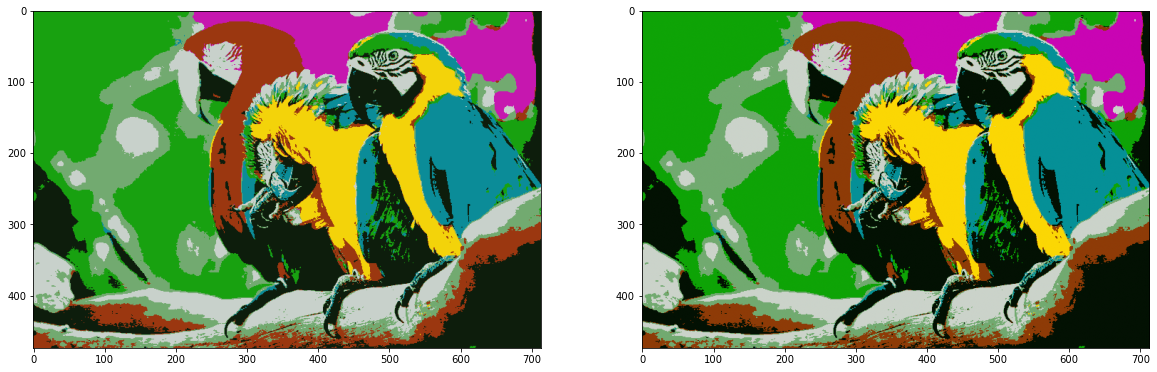

In [267]:
fig, axx = plt.subplots(1, 2, figsize = (20, 20))

axx[0].imshow(new1)
axx[1].imshow(new2)

No handles with labels found to put in legend.


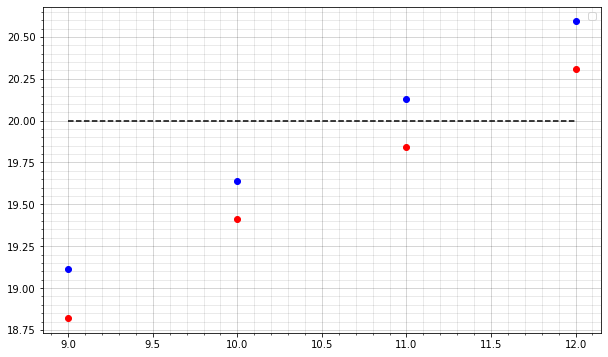

In [272]:
# 5. Найдие минимальное количество кластеров, при котором значение PSNR выше 20 
# (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). 
# Это число и будет ответом в данной задаче.
n_clust = 8
psnr1 = 0
psnr2 = 0

fig = plt.figure(figsize=(10, 6))
plt.grid()

while((psnr1<=20 or psnr2<=20) and n_clust<20):
    n_clust+=1
    km = KMeans(n_clusters = n_clust, init = 'k-means++', random_state=241)
    cl = km.fit(rgb)
    n1 = fill(img, n_clust, cl, 'mean')
    n2 = fill(img, n_clust, cl, 'median')
    psnr1 = PSNR(img, n1)
    psnr2 = PSNR(img, n2)
    plt.plot([n_clust], [psnr1], 'bo')
    plt.plot([n_clust], [psnr2], 'ro')

plt.plot([9, 12], [20, 20], 'k--')

plt.minorticks_on() 
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2) 
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.legend()
plt.show()

In [88]:
a = np.array([0.3, 0.2, 0.1])
i = np.array([0, 0, 1, 1, 2, 2])
a[i]
#к списку вещей которые меня удивляют в 20

# n_i = cl.cluster_centers_[cl.predict(rgb)].reshape(m, n, k)

array([0.3, 0.3, 0.2, 0.2, 0.1, 0.1])